In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


from pydmd import DMD

In [77]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)

x = np.linspace(-5, 5, 128)
t = np.linspace(0, 4*np.pi, 256)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

In [79]:
x.shape, t.shape

((128,), (256,))

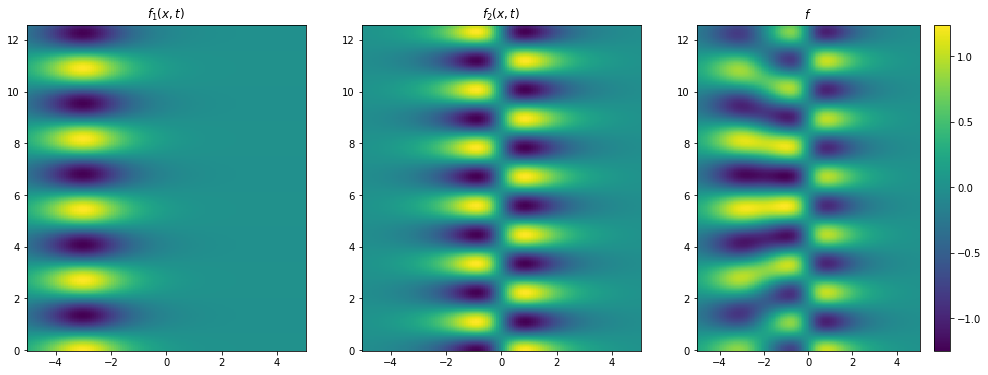

In [80]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$', '$f$']
data = [X1, X2, X]

fig = plt.figure(figsize=(17,6))
for n, title, d in zip(range(131,134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

In [81]:
# shape of X
X.shape # time, x

(256, 128)

In [84]:
dmd = DMD(svd_rank=3)
dmd.fit(X) # 128 x 256

c:\Users\Minh Nhat\.conda\envs\ml\lib\site-packages\pydmd\dmdbase.py:715: UserWarning: Input data matrix X has condition number 4.500191754721647e+18. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [85]:
dmd.modes.shape


(256, 3)

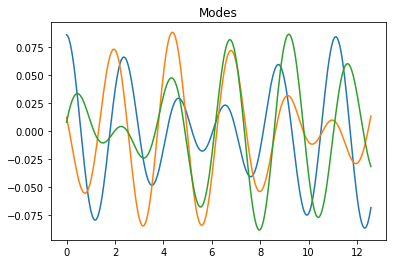

In [86]:
for mode in dmd.modes.T:
    plt.plot(t, mode.real)
    plt.title('Modes')
plt.show()

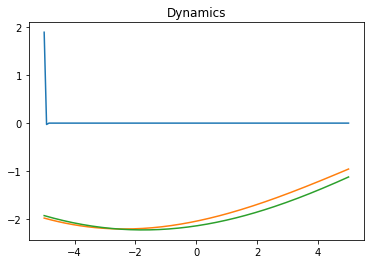

In [88]:
for dynamic in dmd.dynamics:
    plt.plot(x, dynamic.real)
    plt.title('Dynamics')
plt.show()

In [75]:
x

array([-5.        , -4.92125984, -4.84251969, -4.76377953, -4.68503937,
       -4.60629921, -4.52755906, -4.4488189 , -4.37007874, -4.29133858,
       -4.21259843, -4.13385827, -4.05511811, -3.97637795, -3.8976378 ,
       -3.81889764, -3.74015748, -3.66141732, -3.58267717, -3.50393701,
       -3.42519685, -3.34645669, -3.26771654, -3.18897638, -3.11023622,
       -3.03149606, -2.95275591, -2.87401575, -2.79527559, -2.71653543,
       -2.63779528, -2.55905512, -2.48031496, -2.4015748 , -2.32283465,
       -2.24409449, -2.16535433, -2.08661417, -2.00787402, -1.92913386,
       -1.8503937 , -1.77165354, -1.69291339, -1.61417323, -1.53543307,
       -1.45669291, -1.37795276, -1.2992126 , -1.22047244, -1.14173228,
       -1.06299213, -0.98425197, -0.90551181, -0.82677165, -0.7480315 ,
       -0.66929134, -0.59055118, -0.51181102, -0.43307087, -0.35433071,
       -0.27559055, -0.19685039, -0.11811024, -0.03937008,  0.03937008,
        0.11811024,  0.19685039,  0.27559055,  0.35433071,  0.43

In [10]:
dmd.modes.shape

(128, 2)

In [11]:
dmd.modes.T.shape

(2, 128)

### abc

In [89]:
raw_file = './data/hasc-111018-165936-acc.csv'
raw_label = './data/hasc-111018-165936-acc.label'

raw_df = pd.read_csv(raw_file, header=None)
raw_df.columns = ['time', 'x', 'y', 'z']
raw_label_df = pd.read_csv(raw_label, skiprows=1, header=None)
raw_label_df.columns = ['start', 'end', 'label']
print(f'raw shape: {raw_df.shape}, label shape: {raw_label_df.shape}')
print('Raw activity data')
print(raw_df.head(2))
print('\nraw label data')
print(raw_label_df.head(2))

raw shape: (39397, 4), label shape: (39, 3)
Raw activity data
          time         x         y         z
0  5015.672119  0.115128 -0.988739 -0.090057
1  5015.687371  0.110138 -0.986694 -0.086288

raw label data
      start      end                    label
0  5057.661  5091.26  walk;floor;B2F;steps;44
1  5071.934      NaN       move;escalator;B2F


In [90]:
X = raw_df[['x', 'y', 'z']].to_numpy()
print(f'shape: {X.shape}')

shape: (39397, 3)


In [91]:
dmd = DMD(svd_rank=2)
dmd.fit(X)

In [92]:
dmd.modes.shape

(39397, 2)

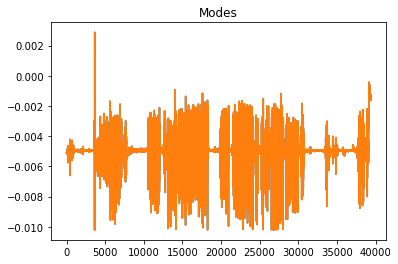

In [93]:
for mode in dmd.modes.T:
    plt.plot(range(len(mode.real)), mode.real)
    plt.title('Modes')
plt.show()

Text(0.5, 1.0, 'Modes')

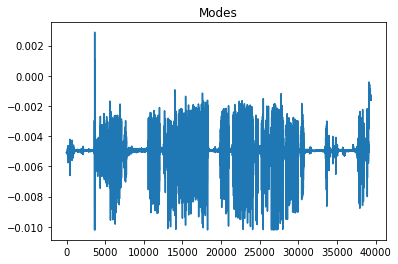

In [94]:
plt.plot(range(len(dmd.modes.T[0].real)), dmd.modes.T[0].real)
plt.title('Modes')

Text(0.5, 1.0, 'Modes')

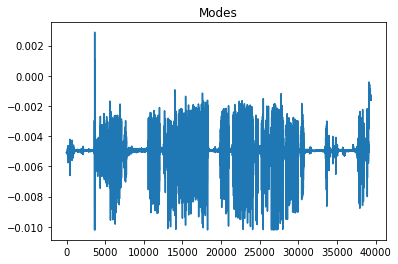

In [95]:
plt.plot(range(len(dmd.modes.T[1].real)), dmd.modes.T[1].real)
plt.title('Modes')

In [63]:
dmd.modes.real

array([[-0.00506833, -0.00506833],
       [-0.00505802, -0.00505802],
       [-0.00508332, -0.00508332],
       ...,
       [-0.00133034, -0.00133034],
       [-0.00135656, -0.00135656],
       [-0.00140032, -0.00140032]])